In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import shutil

src1="/kaggle/input/plantvillage/PlantVillage/train"
train_dir ="/kaggle/working/grape_train"         
os.makedirs(train_dir, exist_ok=True)
for folder in os.listdir(src1):
    if folder.startswith("Grape"):
        shutil.copytree(os.path.join(src1,folder),os.path.join(train_dir,folder))

src2="/kaggle/input/plantvillage/PlantVillage/val"
val_dir="/kaggle/working/grape_validation"
os.makedirs(val_dir,exist_ok=True)
for folder in os.listdir(src2):
    if folder.startswith("Grape"):
        shutil.copytree(os.path.join(src2,folder),os.path.join(val_dir,folder))

In [7]:
train_healthy="/kaggle/working/grape_train/Grape___healthy"
train_blk="/kaggle/working/grape_train/Grape___Black_rot"
train_esca="/kaggle/working/grape_train/Grape___Esca_(Black_Measles)"
train_lb="/kaggle/working/grape_train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)"

val_healthy="/kaggle/working/grape_validation/Grape___healthy"
val_blk="/kaggle/working/grape_validation/Grape___Black_rot"
val_esca="/kaggle/working/grape_validation/Grape___Esca_(Black_Measles)"
val_lb="/kaggle/working/grape_validation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)"

In [8]:
print("Total files in train_healthy:",len(os.listdir(train_healthy)))
print("Total files in train_blk:",len(os.listdir(train_blk)))
print("Total files in train_esca:",len(os.listdir(train_esca)))
print("Total files in train_lb:",len(os.listdir(train_lb)))
print("\n")
print("Total files in validation_healthy:",len(os.listdir(val_healthy)))
print("Total files in validation_blk:",len(os.listdir(val_blk)))
print("Total files in validation_esca:",len(os.listdir(val_esca)))
print("Total files in validation_lb:",len(os.listdir(val_lb)))

Total files in train_healthy: 339
Total files in train_blk: 944
Total files in train_esca: 1107
Total files in train_lb: 861


Total files in validation_healthy: 84
Total files in validation_blk: 236
Total files in validation_esca: 276
Total files in validation_lb: 215


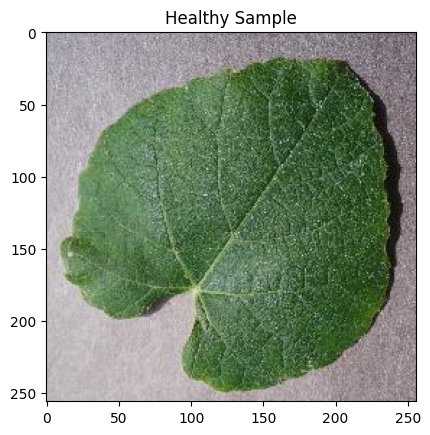

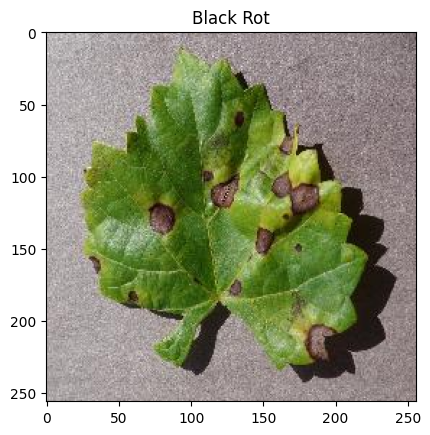

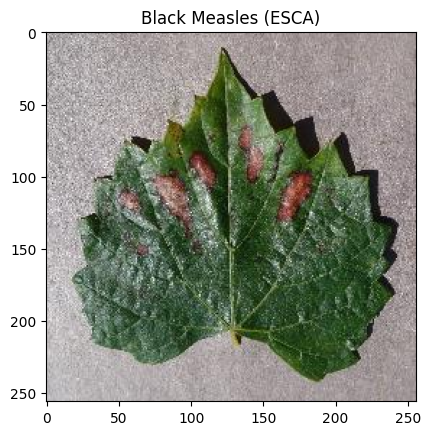

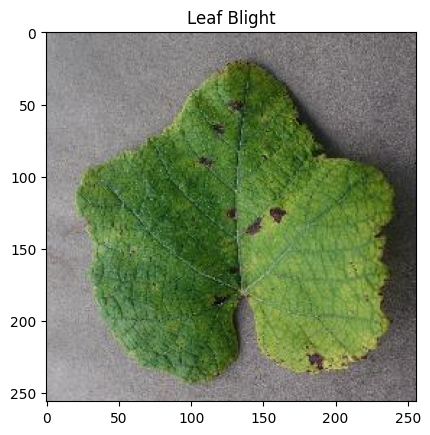

In [11]:
import cv2
import matplotlib.pyplot as plt

hl_img="/kaggle/working/grape_train/Grape___healthy/0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004.JPG"
img0=cv2.imread(hl_img)
img0=cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
plt.imshow(img0)
plt.title("Healthy Sample")
plt.show()

blk_img="/kaggle/working/grape_train/Grape___Black_rot/00905d40-bddf-460e-b348-1dbb6a34653b___FAM_B.Rot 0664.JPG"
img1=cv2.imread(blk_img)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title("Black Rot")
plt.show()

esca_img="/kaggle/working/grape_train/Grape___Esca_(Black_Measles)/0279ec2c-5470-47e8-b1ba-79442bd323bb___FAM_B.Msls 4396.JPG"
img2=cv2.imread(esca_img)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title("Black Measles (ESCA)")
plt.show()

lb_img="/kaggle/working/grape_train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/091c3fe2-2340-4159-a040-77cfad36c862___FAM_L.Blight 1515.JPG"
img3=cv2.imread(lb_img)
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.title("Leaf Blight")
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True,shear_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir="/kaggle/working/grape_train"
val_dir="/kaggle/working/grape_validation"

train_gen=train_datagen.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='categorical')
val_gen=val_datagen.flow_from_directory(val_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 3251 images belonging to 4 classes.
Found 811 images belonging to 4 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_gen,validation_data=val_gen,epochs=10)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 0.4582 - loss: 1.1282 - val_accuracy: 0.6227 - val_loss: 0.9876
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.7931 - loss: 0.5528 - val_accuracy: 0.6979 - val_loss: 1.0471
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.8722 - loss: 0.3395 - val_accuracy: 0.8631 - val_loss: 0.3996
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.8750 - loss: 0.3226 - val_accuracy: 0.9075 - val_loss: 0.2575
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9052 - loss: 0.2718 - val_accuracy: 0.9063 - val_loss: 0.2463
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.9203 - loss: 0.2094 - val_accuracy: 0.8890 - val_loss: 0.3416
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.9273 - loss: 0.2111 - val_accuracy: 0.9420 - val_loss: 0.1680
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9386 - loss: 0

In [18]:
model.save("grape_plant.h5")